## Project Roots Market Survey (Analysis)

The aim of this code is to analyse the data generated in the .ipyb 'Project Roots Market Survey (Engineering)' file

### Import packages

In [1]:
import pandas as pd
pd.set_option('display.max_rows',250)
# pd.set_option('display.max_columns',None)

import os
import pickle
from datetime import date, datetime

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np

import seaborn as sns

### Note: 
If using a new environment, pip install the following from terminal:\
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

In [2]:
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow,Flow
from google.auth.transport.requests import Request

In [3]:
from dython.nominal import associations

In [4]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

### Create function to connect to Google Sheets API
Used walkthrough to connect to and read from Google Sheet\
https://medium.com/analytics-vidhya/how-to-read-and-write-data-to-google-spreadsheet-using-python-ebf54d51a72c

In [5]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']  

def connectGSheet(gsheet_id, gsheet_range):
    global values_input, service
    creds = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            # Specify json file generated using this tutorial:
            # https://developers.google.com/sheets/api/quickstart/python
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES) 
            creds = flow.run_local_server(port=0)
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('sheets', 'v4', credentials=creds)

    # Call the Google Sheets API
    sheet = service.spreadsheets()
    result_input = sheet.values().get(spreadsheetId=gsheet_id,
                                range=gsheet_range).execute()
    values_input = result_input.get('values', [])

    if not values_input and not values_expansion:
        print('No data found.')

**Read sheet:** 2024-10-01-14:20-output

In [6]:
# Define google sheet id and range
gsheet_id = '1YDodYS7JAV7R0icO0s28i9UGKHO2LbOcbfCYjmhvSmI'
gsheet_range = '2024-10-06-20:20-wide-dataset!A1:AE201'      
    
# Function call   
connectGSheet(gsheet_id, gsheet_range)

In [7]:
# Generate data frame of engineered data set
df = pd.DataFrame(values_input[1:], columns=values_input[0])

### Correlation Matrix
**Findings:** Not helpful due to the lack of numeric data, also using the Pearson method there is a weak correlation between Age and Q03

In [8]:
# Create function to convert columns to numeric
def convertNumeric(header_name):
    df[header_name] = pd.to_numeric(df[header_name])

In [9]:
# Call function
convertNumeric('Q03 How connected do you currently feel to your cultural identity (roots)?')
convertNumeric('Q14 Age?')

In [10]:
# Select only numeric columns (e.g., int, float)
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
df_numeric.corr()

,Q03 How connected do you currently feel to your cultural identity (roots)?,Q14 Age?
Q03 How connected do you currently feel to your cultural identity (roots)?,1.000000,0.027432
Q14 Age?,0.027432,1.000000


### Histogram
**Findings:** Data is highly scewed toward the 25-32 age group, and therefore must be considered if age is used in further analysis

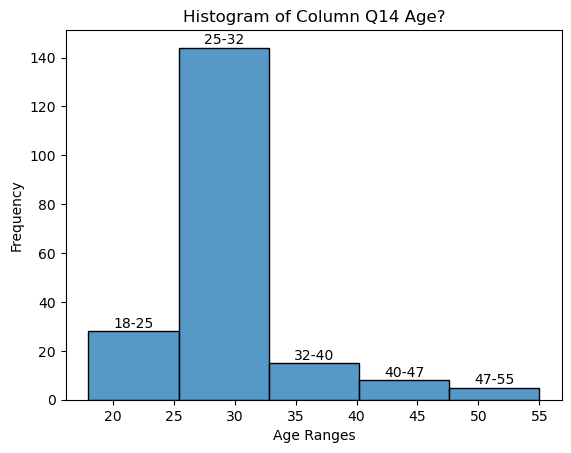

In [11]:
# Number of bins
num_bins = 5

# Automatically calculate bin edges based on the data range and number of bins
bin_edges = np.histogram_bin_edges(df['Q14 Age?'], bins=num_bins)

# Plot histogram using seaborn
hist = sns.histplot(df['Q14 Age?'], bins=bin_edges, kde=False)

# Automatically generate bin labels
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges)-1)]

# Add labels on top of each bar
for i, patch in enumerate(hist.patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 1.5, bin_labels[i], ha='center')

# Set plot labels and title
plt.xlabel('Age Ranges')
plt.ylabel('Frequency')
plt.title('Histogram of Column Q14 Age?')

plt.show()

In [12]:
# Filter dataframe for categorical variables only
df_cat = df[['Q01 Did you experience uncertainty or conflict between your family culture and the culture of the country you grew up in?', 'Q03 How connected do you currently feel to your cultural identity (roots)?', 'Q04 Did you wish you felt more connected to your cultural identity (roots)?','Q06 Would you visit the country of your ethnic origin to learn more about your cultural identity?',"Q08 Do you think it's important to connect back to your cultural identity (roots)?",'Q10i Suppose there was a cultural reconnection programme that was established in the motherland to help diaspora people reconnect back with their cultural identity. Would you be interested to fly back and participate? (Where you would formally learn about your culture and also work with a local NGO solving a social problem)','Q11 Would you be willing to pay for the programme?','Q13 How long would you be willing to volunteer with a local NGO in the country of your ethnic origin?','CF Total ethnicities (List)','CF Total ethnicities (Number)','CF Total countries grown up in (List)','CF Total countries grown up in (Number)']]

In [14]:
# Rename for ease of view in matrix (below)
df_cat = df_cat.rename(columns={'Q01 Did you experience uncertainty or conflict between your family culture and the culture of the country you grew up in?':'Q01', 'Q03 How connected do you currently feel to your cultural identity (roots)?':'Q03', 'Q04 Did you wish you felt more connected to your cultural identity (roots)?':'Q04','Q06 Would you visit the country of your ethnic origin to learn more about your cultural identity?':'Q06',"Q08 Do you think it's important to connect back to your cultural identity (roots)?":"Q08",'Q10i Suppose there was a cultural reconnection programme that was established in the motherland to help diaspora people reconnect back with their cultural identity. Would you be interested to fly back and participate? (Where you would formally learn about your culture and also work with a local NGO solving a social problem)':'Q10i','Q11 Would you be willing to pay for the programme?':'Q11','Q13 How long would you be willing to volunteer with a local NGO in the country of your ethnic origin?':'Q13','Q15 What country is your first ethnic background?':'Q15','Q16 What country is your second ethnic background? (If you have multiple)':'Q16','Q17 What country is your third ethnic background? (If you have multiple)':'Q17','Q18 Please list the rest of your ethnicities here if you have more than 3 (Cleansed)':'Q18','Q19 What country did you grow up in primarily?':'Q19','Q20 Please add any other countries you grew up in (Cleansed)':'Q20'})

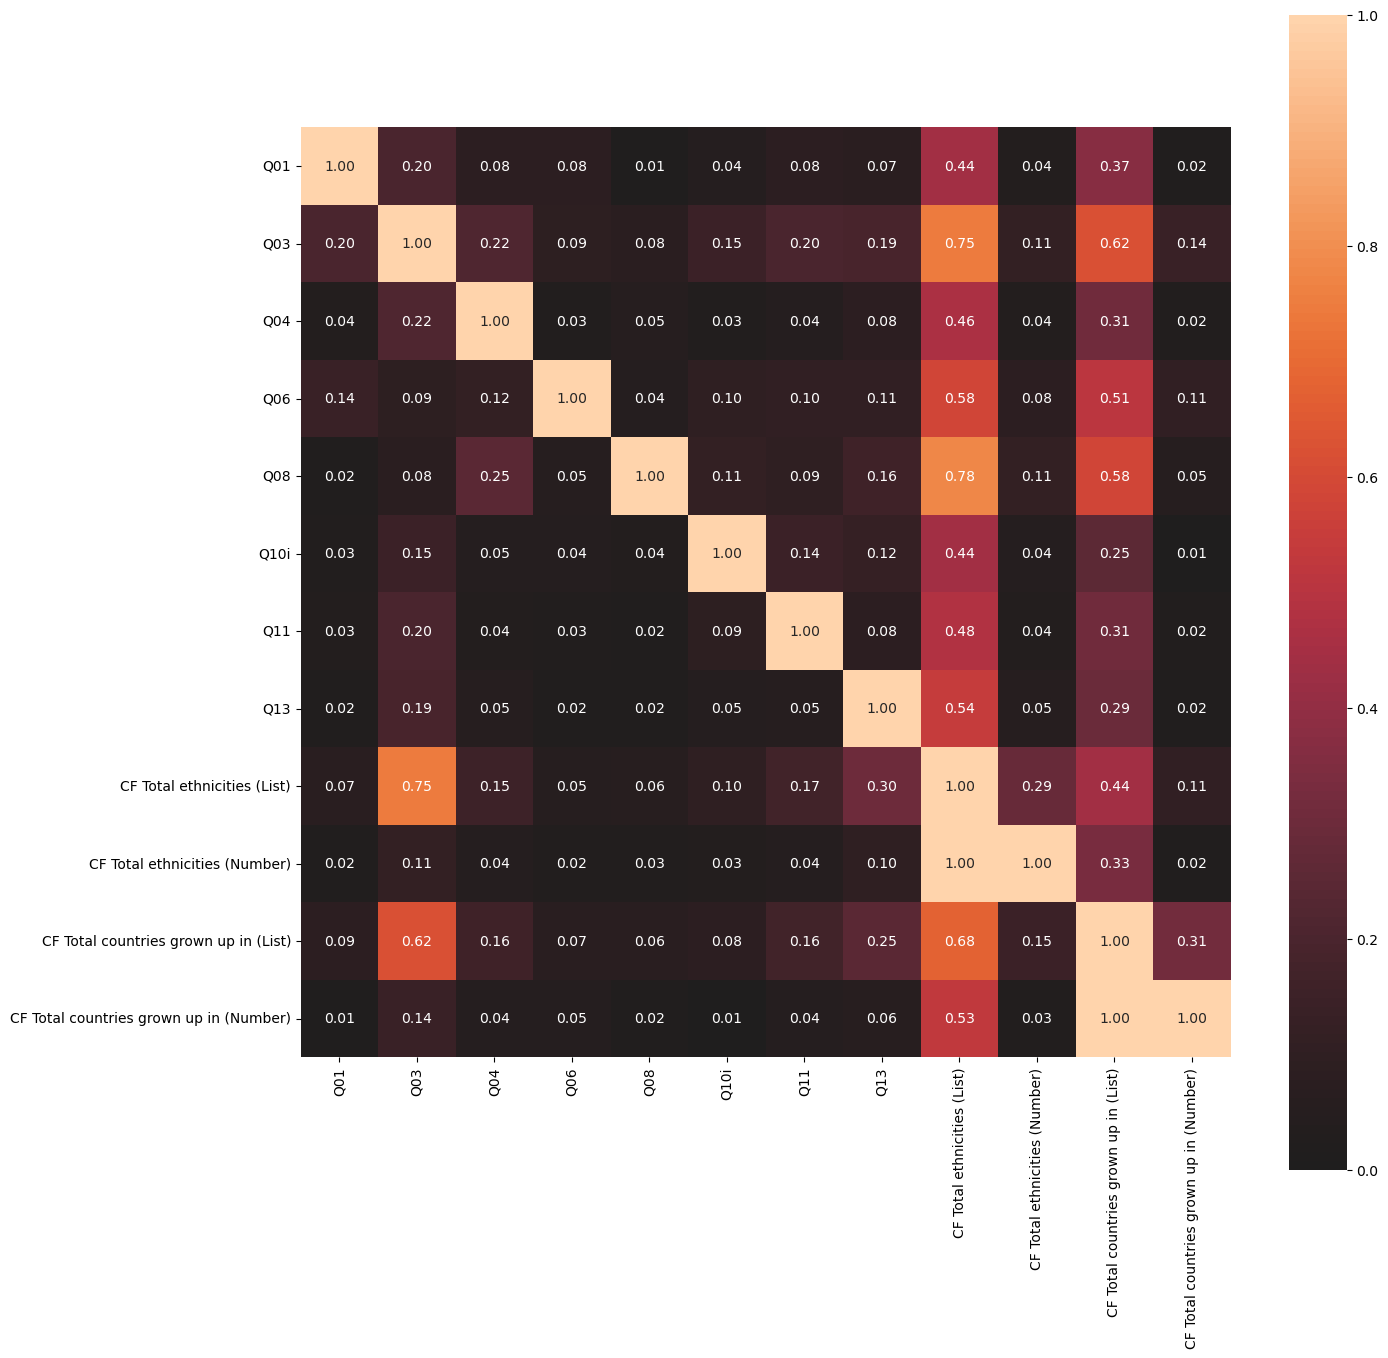

{'corr':                                               Q01       Q03       Q04  \
 Q01                                      1.000000  0.199503  0.081747   
 Q03                                      0.199503  1.000000  0.218594   
 Q04                                      0.036913  0.218594  1.000000   
 Q06                                      0.139669  0.090596  0.116484   
 Q08                                      0.016260  0.077517  0.246812   
 Q10i                                     0.029587  0.146622  0.045511   
 Q11                                      0.033650  0.196262  0.038592   
 Q13                                      0.020310  0.188380  0.047492   
 CF Total ethnicities (List)              0.065864  0.745944  0.153068   
 CF Total ethnicities (Number)            0.019809  0.113346  0.043478   
 CF Total countries grown up in (List)    0.085887  0.617302  0.156669   
 CF Total countries grown up in (Number)  0.012714  0.140602  0.039328   
 
                            

In [15]:
# Plot correlation matrix of categorical variables
associations(df_cat, nom_nom_assoc='theil', figsize=(15, 15))